In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
!head cars.csv

In [3]:
names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [4]:
data = pd.read_csv('cars.csv', header=None, names=names)

In [5]:
data.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
data.shape

(1728, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
for col in data.columns:
    print(data[col].value_counts())
    print()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

2       576
4       576
more    576
Name: persons, dtype: int64

small    576
med      576
big      576
Name: lug_boot, dtype: int64

low     576
med     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



In [9]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [10]:
X = data.drop(['class'], axis=1)
y = data['class']

In [11]:
X.head(5)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [12]:
type(y)

pandas.core.series.Series

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [14]:
X.shape

(1728, 6)

In [15]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [16]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [17]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

**READ [THIS](https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)** before running the next cell

In [18]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1261,1,1,1,1,1,1
1727,2,1,2,1,2,2
548,3,2,3,2,2,2
1507,2,2,2,1,3,1
494,3,3,1,2,2,2


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1318,2,3,3,1,3,1
124,4,2,3,3,2,1
648,3,4,3,2,1,3
249,4,4,4,2,2,3
1599,2,4,2,2,2,3


In [21]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
# print(f'Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
# The former is NOT a f-string as {0} is the identifier of the first computed variable in the
# `format` function, hence we got 0.

# Corrected f-string
print(f'Model accuracy score: {accuracy_score(y_test, y_pred):0.4f}')

# or, if you want to maintain the `format` function:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7846
Model accuracy score: 0.7846


In [24]:
def pipeline(data):
    classifiers = []
    pass

In [25]:
y_pred_train = clf.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.7847882454624028

[Text(418.5, 380.52, 'X[5] <= 2.5\ngini = 0.456\nsamples = 1157\nvalue = [258, 42, 811, 46]'),
 Text(334.8, 271.8, 'X[3] <= 2.5\ngini = 0.58\nsamples = 765\nvalue = [258, 42, 419, 46]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.5\ngini = 0.495\nsamples = 509\nvalue = [124, 22, 338, 25]'),
 Text(83.7, 54.360000000000014, 'gini = 0.638\nsamples = 255\nvalue = [124, 22, 84, 25]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 254\nvalue = [0, 0, 254, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.613\nsamples = 256\nvalue = [134, 20, 81, 21]'),
 Text(418.5, 54.360000000000014, 'gini = 0.614\nsamples = 122\nvalue = [69, 20, 12, 21]'),
 Text(585.9, 54.360000000000014, 'gini = 0.5\nsamples = 134\nvalue = [65, 0, 69, 0]'),
 Text(502.20000000000005, 271.8, 'gini = 0.0\nsamples = 392\nvalue = [0, 0, 392, 0]')]

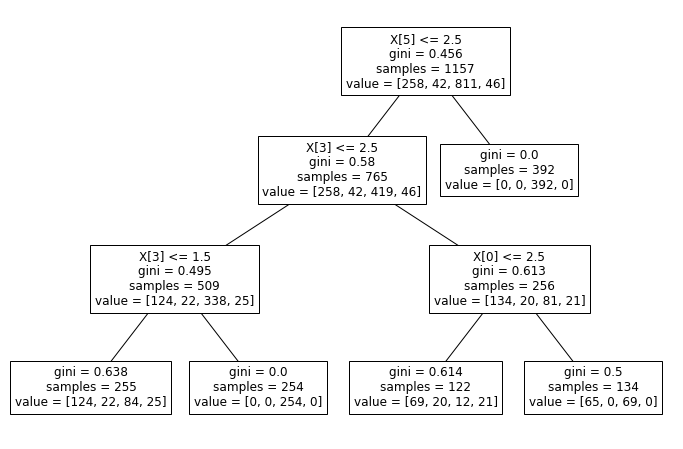

In [26]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf.fit(X_train, y_train))

In [27]:
cm = confusion_matrix(y_test, y_pred)

cm

array([[101,   0,  25,   0],
       [ 27,   0,   0,   0],
       [ 52,   0, 347,   0],
       [ 19,   0,   0,   0]])

In [28]:
y_true = [1,1,0,0,0,1]
y_sim = [0,1,0,0,1,1]
confusion_matrix(y_true, y_sim)

array([[2, 1],
       [1, 2]])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.51      0.80      0.62       126
        good       0.00      0.00      0.00        27
       unacc       0.93      0.87      0.90       399
       vgood       0.00      0.00      0.00        19

    accuracy                           0.78       571
   macro avg       0.36      0.42      0.38       571
weighted avg       0.76      0.78      0.77       571



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa